In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
from keras.models import load_model
from keras import optimizers
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv


Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    zca_whitening=False,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



def standardize(input):
    mean = np.mean(input)
    std = np.std(input)
    return (input - mean) / std

train_images, test_images = standardize(train_images)  , standardize(test_images) 

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/20
1563/1562 [==============================] - 591s 378ms/step - loss: 1.7436 - acc: 0.3627
Epoch 2/20
1563/1562 [==============================] - 609s 389ms/step - loss: 1.4138 - acc: 0.4891
Epoch 3/20
1563/1562 [==============================] - 615s 394ms/step - loss: 1.2714 - acc: 0.5460
Epoch 4/20
1563/1562 [==============================] - 599s 384ms/step - loss: 1.1911 - acc: 0.5752
Epoch 5/20
1563/1562 [==============================] - 605s 387ms/step - loss: 1.1463 - acc: 0.5946
Epoch 6/20
1563/1562 [==============================] - 656s 419ms/step - loss: 1.1138 - acc: 0.6083
Epoch 7/20
1563/1562 [==============================] - 633s 405ms/step - loss: 1.1045 - acc: 0.6150
Epoch 8/20
1563/1562 [==============================] - 623s 399ms/step - loss: 1.0835 - acc: 0.6213
Epoch 9/20
1563/1562 [==============================] - 616s 394ms/step - loss: 1.0766 - acc: 0.6253
Epoch 10/2

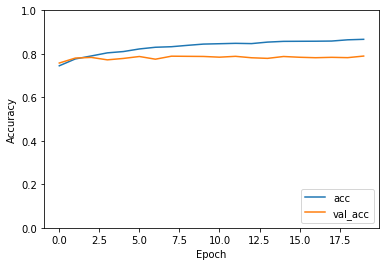

10000/10000 - 43s - loss: 0.7528 - acc: 0.7898
0.7898


In [4]:


model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3),  kernel_initializer='he_normal'))
model.add(layers.Conv2D(64, (3, 3), strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3),  kernel_initializer='he_normal'))
model.add(layers.Conv2D(128, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3),  kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3),  kernel_initializer='he_normal'))
model.add(layers.Conv2D(256, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3),  kernel_initializer='he_normal'))
model.add(layers.MaxPooling2D((2, 2), strides=2, padding='same'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax',  kernel_initializer='he_normal'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

datagen.fit(train_images)
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),
                    steps_per_epoch=len(train_images) / 32, epochs=20)

history = model.fit(train_images, train_labels, epochs=20,
                   validation_data=(test_images, test_labels))

model.save('model.h5')
print(model.metrics_names)

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)



In [3]:
loaded_model = tf.keras.models.load_model('model.h5')
loaded_model.layers[0].input_shape
loaded_model.evaluate(test_images, test_labels)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
10000/10000 [==============================] - 38s 4ms/sample - loss: 0.7528 - acc: 0.7898


[0.7527634162425995, 0.7898]

Prediction:frog


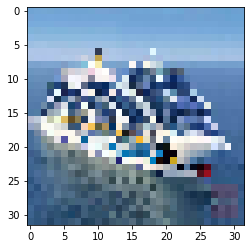

Prediction:ship


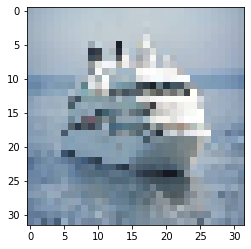

Prediction:airplane


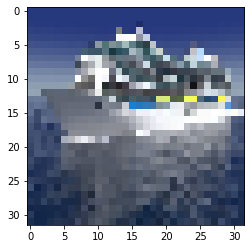

Prediction:deer


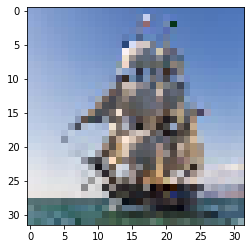

Prediction:ship


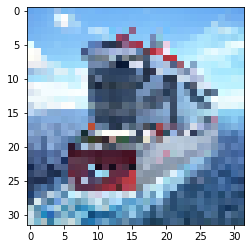

Prediction:ship


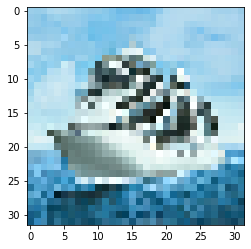

Prediction:ship


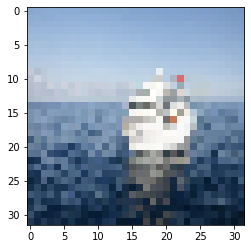

Prediction:ship


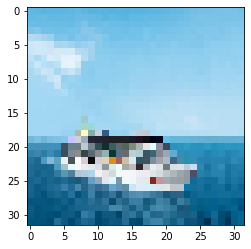

Prediction:ship


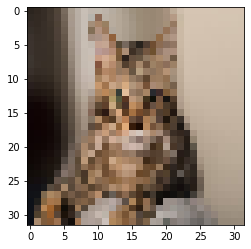

Prediction:cat


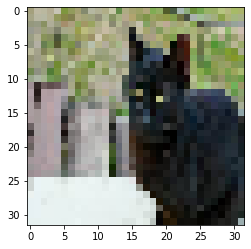

Prediction:deer


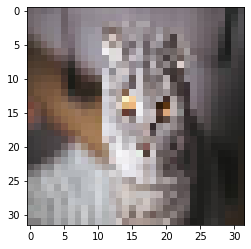

Prediction:cat


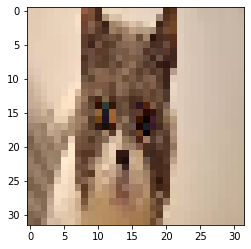

Prediction:cat


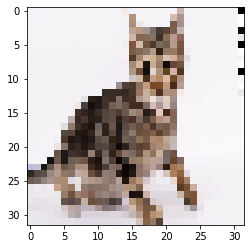

Prediction:ship


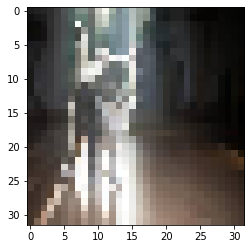

In [4]:

def input(pictureArray):
    for i in range(0, len(pictureArray)):
        process(pictureArray[i])

def process (img):
    image = cv.imread(img, cv.IMREAD_COLOR)
    image = cv.resize(image, (32, 32))
    image = image.astype('float32')
    image = image.reshape(1, 32, 32, 3)
    image = 255-image
    image /= 255
    plt.show()
    pred = loaded_model.predict(image.reshape(1, 32, 32, 3), batch_size=1)
    print('Prediction:' + class_names [pred.argmax()])
    img = load_img(img, target_size=(32, 32))
    plt.figure()
    plt.imshow(img) 
    plt.show()

pictureArray = ['C:/Users/user/Test Images/ship1.jpg', 
                'C:/Users/user/Test Images/ship2.jpg', 
                'C:/Users/user/Test Images/ship3.jpg', 
                'C:/Users/user/Test Images/ship4.jpg', 
                'C:/Users/user/Test Images/ship5.jpg', 
                'C:/Users/user/Test Images/ship6.jpg', 
                'C:/Users/user/Test Images/ship7.jpg', 
                'C:/Users/user/Test Images/ship8.jpg', 
                'C:/Users/user/Test Images/cat1.jpg', 
                'C:/Users/user/Test Images/cat2.jpg', 
                'C:/Users/user/Test Images/cat3.jpg', 
                'C:/Users/user/Test Images/cat4.jpg', 
                'C:/Users/user/Test Images/cat5.jpg', 
                'C:/Users/user/Test Images/cat6.jpg', ]

input(pictureArray)


